In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img

In [34]:
# Sobel edge operator
kernel_Sobel_x = np.array([
    [-0.5, 0, 0.5],
    [-1, 0, 1],
    [-0.5, 0, 0.5]
])
kernel_Sobel_y = np.array([
    [0.5, 1, 0.5],
    [0, 0, 0],
    [-0.5, -1, -0.5]
])

In [35]:
# Roberts edge operator
kernel_Roberts_x = np.array( [[ 0, 0, 0 ],
                             [ 0, 1, 0 ],
                             [ 0, 0,-1 ]] )

kernel_Roberts_y = np.array( [[ 0, 0, 0 ],
                             [ 0, 0, 1 ],
                             [ 0,-1, 0 ]] )

In [36]:
# Plot few images in a row for comparison
def plot_images(images, labels) :
    fig, axes = plt.subplots(1, len(images))
    for idx, ax in enumerate(axes) :
        

        ax.imshow(images[idx], cmap=plt.get_cmap('gray'))
        ax.set_title(labels[idx])
        ax.axis('off')
    plt.show()

In [37]:
# Convert RGB image to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [38]:
def apply_filter(image: np.ndarray, kernel_x: np.ndarray, kernel_y: np.ndarray) :
    result = image.copy()
    # Add padding for image to avoid index out of bounds
    image = np.vstack((image[-1], image, image[0]))
    image = np.hstack((image[:,-1][:, np.newaxis], image, image[:,0][:, np.newaxis]))
    # Iterate through image
    for i in range(1, image.shape[0] - 2) :
        for j in range(1, image.shape[1] - 2) :
            result[i, j] = np.sqrt(
                np.sum(kernel_x * image[i-1:i+2, j-1:j+2])**2 +
                np.sum(kernel_y * image[i-1:i+2, j-1:j+2])**2
            )
    return result

In [39]:
# Read images
images = [
    img.imread('1.jpeg'),
    img.imread('2.jpeg'),
]

labels = [
    'Original',
    'Grayscale',
    'Sobel',
    'Roberts'
]

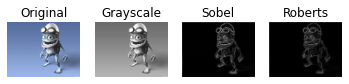

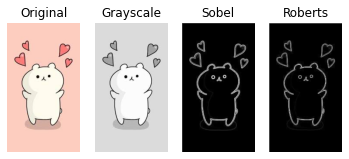

In [40]:
#show images
for img in images:
    imgs = [
        img,
        rgb2gray(img),
        apply_filter(rgb2gray(img), kernel_Sobel_x, kernel_Sobel_y),
        apply_filter(rgb2gray(img), kernel_Roberts_x, kernel_Roberts_y),
    ]
    plot_images(imgs, labels)